In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import networkx as nx
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

%matplotlib inline
pd.options.display.max_rows = 68
pd.options.display.max_columns = 68

In [38]:
# read the sequences file
arquivo = 'hikoyu_fasta.txt'

file_content = open(arquivo, "r")

all_lines = file_content.readlines();

sequences = {}
sequences_info = {}
description = ''

for line in all_lines:
    
    sequence = []
    
    if ">" in line:
        description = line[1:line.find('.') + 2 ]
        sequence = []
        sequences[description] = sequence
    else:
        sequences[description].append(line)
        
file_content.close()

In [39]:
#count A,T,C,G,AA,AT,AC,AG,TT,TA,TC,TG,CC,CA,CT,CG,GG,GA,GT,GC for each sequence

for description in sequences:
    
    sequences_info[description] = {}
    
    sequences_info[description]['A'] = 0
    sequences_info[description]['T'] = 0
    sequences_info[description]['C'] = 0
    sequences_info[description]['G'] = 0
    
    sequences_info[description]['AA'] = 0
    sequences_info[description]['AT'] = 0
    sequences_info[description]['AC'] = 0
    sequences_info[description]['AG'] = 0
    
    sequences_info[description]['TA'] = 0
    sequences_info[description]['TT'] = 0
    sequences_info[description]['TC'] = 0
    sequences_info[description]['TG'] = 0
    
    sequences_info[description]['CA'] = 0
    sequences_info[description]['CT'] = 0
    sequences_info[description]['CC'] = 0
    sequences_info[description]['CG'] = 0
    
    sequences_info[description]['GA'] = 0
    sequences_info[description]['GT'] = 0
    sequences_info[description]['GC'] = 0
    sequences_info[description]['GG'] = 0
    
    sequences_info[description]['SIZE'] = 0
    
   # key = '>MT126808.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/SP02/human/2020/BRA, complete genome\n'
    #key = '>MN996532.1 Bat coronavirus RaTG13, complete genome\n'
   
    for line in sequences[description]:
        
        sequences_info[description]['SIZE'] += len(line.replace('\n', ''))
        sequences_info[description]['A'] += len(re.findall('(?=A)', line))
        sequences_info[description]['T'] += len(re.findall('(?=T)', line))
        sequences_info[description]['C'] += len(re.findall('(?=C)', line))
        sequences_info[description]['G'] += len(re.findall('(?=G)', line))
        
        sequences_info[description]['AA'] += len(re.findall('(?=AA)', line))
        sequences_info[description]['AT'] += len(re.findall('(?=AT)', line))
        sequences_info[description]['AC'] += len(re.findall('(?=AC)', line))
        sequences_info[description]['AG'] += len(re.findall('(?=AG)', line))
    
        sequences_info[description]['TA'] += len(re.findall('(?=TA)', line))
        sequences_info[description]['TT'] += len(re.findall('(?=TT)', line))
        sequences_info[description]['TC'] += len(re.findall('(?=TC)', line))
        sequences_info[description]['TG'] += len(re.findall('(?=TG)', line))
    
        sequences_info[description]['CA'] += len(re.findall('(?=CA)', line))
        sequences_info[description]['CT'] += len(re.findall('(?=CT)', line))
        sequences_info[description]['CC'] += len(re.findall('(?=CC)', line))
        sequences_info[description]['CG'] += len(re.findall('(?=CG)', line))
    
        sequences_info[description]['GA'] += len(re.findall('(?=GA)', line))
        sequences_info[description]['GT'] += len(re.findall('(?=GT)', line))
        sequences_info[description]['GC'] += len(re.findall('(?=GC)', line))
        sequences_info[description]['GG'] += len(re.findall('(?=GG)', line))
    

In [40]:
#calc dinucleotideo bias

for description in sequences:
         
    fA = sequences_info[description]['A'] / sequences_info[description]['SIZE'] 
    fT = sequences_info[description]['T'] / sequences_info[description]['SIZE']
    fC = sequences_info[description]['C'] / sequences_info[description]['SIZE']
    fG = sequences_info[description]['G'] / sequences_info[description]['SIZE'] 
        
    fAA = sequences_info[description]['AA'] / sequences_info[description]['SIZE']       
    fAT = sequences_info[description]['AT'] / sequences_info[description]['SIZE']       
    fAC = sequences_info[description]['AC'] / sequences_info[description]['SIZE']       
    fAG = sequences_info[description]['AG'] / sequences_info[description]['SIZE']    
      
    fTA = sequences_info[description]['TA'] / sequences_info[description]['SIZE']       
    fTT = sequences_info[description]['TT'] / sequences_info[description]['SIZE']       
    fTC = sequences_info[description]['TC'] / sequences_info[description]['SIZE']       
    fTG = sequences_info[description]['TG'] / sequences_info[description]['SIZE']       

    fCA = sequences_info[description]['CA'] / sequences_info[description]['SIZE']       
    fCT = sequences_info[description]['CT'] / sequences_info[description]['SIZE']       
    fCC = sequences_info[description]['CC'] / sequences_info[description]['SIZE']       
    fCG = sequences_info[description]['CG'] / sequences_info[description]['SIZE']       

    fGA = sequences_info[description]['GA'] / sequences_info[description]['SIZE']       
    fGT = sequences_info[description]['GT'] / sequences_info[description]['SIZE']       
    fGC = sequences_info[description]['GC'] / sequences_info[description]['SIZE']       
    fGG = sequences_info[description]['GG'] / sequences_info[description]['SIZE']
        
   # sequences_info[description]['fA'] = fA
    sequences_info[description]['fT'] = fT
    sequences_info[description]['fC'] = fC
    sequences_info[description]['fG'] = fG
       
    sequences_info[description]['pAA'] = fAA/(fA*fA)
    sequences_info[description]['pAT'] = fAT/(fA*fT)
    sequences_info[description]['pAC'] = fAC/(fA*fC)
    sequences_info[description]['pAG'] = fAG/(fA*fG)

    sequences_info[description]['pTA'] = fTA/(fT*fA)
    sequences_info[description]['pTT'] = fTT/(fT*fT)
    sequences_info[description]['pTC'] = fTC/(fT*fC)
    sequences_info[description]['pTG'] = fTG/(fT*fG)
      
    sequences_info[description]['pCA'] = fCA/(fC*fA)
    sequences_info[description]['pCT'] = fCT/(fC*fT)
    sequences_info[description]['pCC'] = fCC/(fC*fC)
    sequences_info[description]['pCG'] = fCG/(fC*fG)

    sequences_info[description]['pGA'] = fGA/(fG*fA)
    sequences_info[description]['pGT'] = fGT/(fG*fT)
    sequences_info[description]['pGC'] = fGC/(fG*fC)
    sequences_info[description]['pGG'] = fGG/(fG*fG)


In [75]:
text = 'ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAAC'
count =  len(re.findall('(?=A)', text))
print(count)

14


In [41]:
#key = '>MT126808.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/SP02/human/2020/BRA, complete genome\n'
key = 'MG772933.1'
sequences_info[key]

{'A': 8740,
 'T': 9468,
 'C': 5574,
 'G': 6020,
 'AA': 2023,
 'AT': 2246,
 'AC': 1963,
 'AG': 1720,
 'TA': 2253,
 'TT': 2377,
 'TC': 1436,
 'TG': 2556,
 'CA': 2057,
 'CT': 2060,
 'CC': 775,
 'CG': 492,
 'GA': 1620,
 'GT': 1957,
 'GC': 1204,
 'GG': 998,
 'SIZE': 29802,
 'fT': 0.31769679887255886,
 'fC': 0.1870344272196497,
 'fG': 0.20199986578082008,
 'pAA': 0.7892569736449373,
 'pAT': 0.8088825759223652,
 'pAC': 1.2008459922211578,
 'pAG': 0.9742399476953254,
 'pTA': 0.8114035812792024,
 'pTT': 0.7902383346639444,
 'pTC': 0.8109136980813054,
 'pTG': 1.3364463196190142,
 'pCA': 1.2583495700452987,
 'pCT': 1.16328845267931,
 'pCC': 0.7433839566525036,
 'pCG': 0.4369654077366796,
 'pGA': 0.9175980902711787,
 'pGT': 1.0232493926034472,
 'pGC': 1.0693218514531755,
 'pGG': 0.8206972329223738}

In [42]:
key = 'MT126808.1'
#key = '>MN996532.1 Bat coronavirus RaTG13, complete genome\n'
sequences_info[key]

{'A': 8927,
 'T': 9596,
 'C': 5492,
 'G': 5861,
 'AA': 2126,
 'AT': 2275,
 'AC': 1987,
 'AG': 1705,
 'TA': 2339,
 'TT': 2424,
 'TC': 1392,
 'TG': 2543,
 'CA': 2039,
 'CT': 2031,
 'CC': 773,
 'CG': 430,
 'GA': 1591,
 'GT': 1957,
 'GC': 1151,
 'GG': 962,
 'SIZE': 29876,
 'fT': 0.3211942696478779,
 'fC': 0.18382648279555497,
 'fG': 0.1961775338063998,
 'pAA': 0.7970299503977404,
 'pAT': 0.7934290140775491,
 'pAC': 1.2108330162976855,
 'pAG': 0.9735753690567984,
 'pTA': 0.8157496544735767,
 'pTT': 0.7864562853669229,
 'pTC': 0.7891161254067077,
 'pTG': 1.3508491388559145,
 'pCA': 1.2425206443034629,
 'pCT': 1.151361243319701,
 'pCC': 0.7656686889862709,
 'pCG': 0.3991063671835243,
 'pGA': 0.9084800071374582,
 'pGT': 1.0395642016284012,
 'pGC': 1.0683056479726432,
 'pGG': 0.8366697746500055}

In [43]:
#creating a dataframe
df_original = pd.DataFrame.from_dict(sequences_info, orient='index', columns=[ 'fT', 'fC', 'fG',
                                                                     'pAA','pAT', 'pAC', 'pAG',
                                                                     'pTA','pTA', 'pTC', 'pTG',
                                                                     'pCA','pCT', 'pCC', 'pCG',
                                                                     'pGA','pGT', 'pGC', 'pGG'])

In [44]:
df_original

,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
LC521925.1,0.321261,0.183798,0.196094,0.801285,0.793189,1.213801,0.975900,0.817267,0.817267,0.785843,1.349755,1.247959,1.154650,0.765634,0.402503,0.907296,1.037046,1.074580,0.835558
LC522972.1,0.321139,0.183714,0.196231,0.796744,0.790769,1.210424,0.973443,0.817616,0.817616,0.780038,1.354868,1.247602,1.152188,0.768541,0.402929,0.910677,1.039387,1.076952,0.841370
LC522973.1,0.321139,0.183714,0.196231,0.796744,0.790420,1.211033,0.973443,0.816919,0.816919,0.780038,1.355399,1.248821,1.151620,0.768541,0.402000,0.910677,1.040450,1.075095,0.841370
LC522974.1,0.321106,0.183747,0.196231,0.796744,0.790502,1.210813,0.973443,0.817004,0.817004,0.779978,1.355541,1.248593,1.152098,0.768261,0.401927,0.910677,1.040027,1.075828,0.841370
LC522975.1,0.321139,0.183747,0.196198,0.796744,0.790769,1.210813,0.973038,0.816919,0.816919,0.779896,1.356162,1.248593,1.151978,0.768261,0.401996,0.910832,1.040096,1.076011,0.840788
LC528232.1,0.321216,0.183700,0.196141,0.801196,0.791962,1.217347,0.978725,0.812510,0.812510,0.784385,1.346121,1.246578,1.155608,0.769029,0.402821,0.913705,1.034008,1.074809,0.837995
LC528233.1,0.321082,0.183901,0.196274,0.798901,0.799448,1.210140,0.971300,0.812348,0.812348,0.782723,1.342049,1.252142,1.163890,0.767352,0.394695,0.907421,1.042755,1.070125,0.825567
LR757995.1,0.321003,0.183784,0.196204,0.796031,0.789272,1.208606,0.974612,0.811245,0.811245,0.792144,1.354312,1.244548,1.155304,0.766124,0.402912,0.913556,1.044967,1.075979,0.834819
LR757996.1,0.320945,0.183742,0.196230,0.799489,0.791767,1.209359,0.980648,0.814090,0.814090,0.787465,1.361997,1.248351,1.164448,0.755671,0.403005,0.897358,1.034522,1.059512,0.830359
LR757997.1,0.207602,0.123180,0.129441,1.213914,1.195414,1.839265,1.466212,1.234030,1.234030,1.229511,2.046303,1.902932,1.772412,1.121303,0.682922,1.369273,1.587911,1.645415,1.265252


In [45]:
df_original.describe()

,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,0.319309,0.182925,0.195282,0.803903,0.798369,1.220289,0.981238,0.821167,0.821167,0.795349,1.362445,1.254288,1.165599,0.770062,0.404266,0.913967,1.048179,1.076738,0.841907
std,0.013758,0.007366,0.008135,0.050520,0.048967,0.076253,0.059806,0.050864,0.050864,0.053615,0.084329,0.079968,0.074951,0.043412,0.034676,0.056253,0.066541,0.070158,0.052324
min,0.207602,0.123180,0.129441,0.788426,0.784220,1.200846,0.963477,0.808026,0.808026,0.779800,1.336446,1.228956,1.151238,0.743384,0.394420,0.889707,1.023249,1.056582,0.820697
25%,0.320960,0.183711,0.196145,0.797021,0.791412,1.209075,0.972156,0.814030,0.814030,0.787312,1.351388,1.241471,1.152463,0.764832,0.398189,0.906404,1.040019,1.066494,0.834816
50%,0.321091,0.183756,0.196201,0.797430,0.792441,1.210795,0.973027,0.815244,0.815244,0.789473,1.352273,1.242771,1.153000,0.765795,0.398719,0.907742,1.041047,1.067531,0.837136
75%,0.321143,0.183824,0.196233,0.798584,0.793081,1.211780,0.974672,0.815902,0.815902,0.790163,1.353692,1.248526,1.160124,0.766419,0.401944,0.908672,1.041668,1.070691,0.837708
max,0.321308,0.187034,0.202000,1.213914,1.195414,1.839265,1.466212,1.234030,1.234030,1.229511,2.046303,1.902932,1.772412,1.121303,0.682922,1.369273,1.587911,1.645415,1.265252


In [46]:
#standardization
#Useful: https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler
scaler = StandardScaler()
std_data = scaler.fit_transform(df_original.values)
df_std = pd.DataFrame(std_data, index=df_original.index, columns=df_original.columns)

In [47]:
df_std

,fT,fC,fG,pAA,pAT,pAC,pAG,pTA,pTA,pTC,pTG,pCA,pCT,pCC,pCG,pGA,pGT,pGC,pGG
LC521925.1,0.142953,0.119317,0.100554,-0.052209,-0.106577,-0.085718,-0.089920,-0.077238,-0.077238,-0.178624,-0.151601,-0.079731,-0.147159,-0.102772,-0.051237,-0.119481,-0.168557,-0.030988,-0.122232
LC522972.1,0.134037,0.107810,0.117619,-0.142752,-0.156364,-0.130343,-0.131309,-0.070328,-0.070328,-0.287697,-0.090517,-0.084225,-0.180261,-0.035311,-0.038863,-0.058921,-0.133107,0.003074,-0.010334
LC522973.1,0.134037,0.107810,0.117619,-0.142752,-0.163537,-0.122291,-0.131309,-0.084140,-0.084140,-0.287697,-0.084172,-0.068869,-0.187887,-0.035311,-0.065836,-0.058921,-0.117025,-0.023589,-0.010334
LC522974.1,0.131586,0.112387,0.117619,-0.142752,-0.161842,-0.125205,-0.131309,-0.082453,-0.082453,-0.288839,-0.082484,-0.071735,-0.181468,-0.041807,-0.067963,-0.058921,-0.123425,-0.013072,-0.010334
LC522975.1,0.134037,0.112387,0.113474,-0.142752,-0.156364,-0.125205,-0.138126,-0.084140,-0.084140,-0.290367,-0.075064,-0.071735,-0.183082,-0.041807,-0.065971,-0.056139,-0.122380,-0.010436,-0.021547
LC528232.1,0.139651,0.105939,0.106397,-0.053965,-0.131812,-0.038871,-0.042340,-0.171458,-0.171458,-0.206021,-0.195017,-0.097122,-0.134290,-0.023973,-0.041983,-0.004703,-0.214556,-0.027704,-0.075325
LC528233.1,0.129856,0.133381,0.122963,-0.099747,0.022212,-0.134094,-0.167408,-0.174657,-0.174657,-0.237254,-0.243659,-0.027034,-0.022970,-0.062896,-0.278063,-0.117229,-0.082125,-0.094963,-0.314595
LR757995.1,0.124052,0.117435,0.114208,-0.156966,-0.187153,-0.154353,-0.111620,-0.196514,-0.196514,-0.060233,-0.097165,-0.122701,-0.138370,-0.091388,-0.039352,-0.007363,-0.048626,-0.010903,-0.136476
LR757996.1,0.119845,0.111643,0.117462,-0.088006,-0.135832,-0.144411,-0.009949,-0.140169,-0.140169,-0.148156,-0.005356,-0.074791,-0.015461,-0.333960,-0.036654,-0.297450,-0.206767,-0.247353,-0.222332
LR757997.1,-8.180074,-8.171014,-8.153627,8.176135,8.168764,8.177771,8.169440,8.177340,8.177340,8.158042,8.169671,8.171637,8.156345,8.151043,8.095748,8.154033,8.171530,8.165868,8.150949


In [48]:
#create a distance matrix
#useful: https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

distance_matrix = pd.DataFrame(
    squareform(pdist(df_std, metric='euclidean')),
    columns = df_std.index,
    index = df_std.index
)


In [49]:
distance_matrix

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,0.000000,0.234593,0.238694,0.236127,0.235131,0.223555,0.422809,0.313662,0.451762,36.041878,0.383403,1.652275,0.270963,0.482717,0.271676,0.246538,0.335673,0.335673,0.251378,0.262532,0.235601,0.175147,0.250277,0.295247,0.521759,0.392587,0.807162,0.257804,0.296663,0.446803,0.246744,0.256939,0.264260,0.247733,0.237265,0.491560,0.246538,0.246538,0.240018,0.240018,0.236294,0.230602,0.212579,0.237056,0.286350,0.249142,0.252395,0.296113,0.462741,0.249758,0.230679,0.276623,0.226590,0.360775,0.272063,0.237345,0.237620,0.243778,0.238230,0.460539,0.341612,0.440286,0.207521,0.277378,0.277378,0.277387,0.277378,0.452036
LC522972.1,0.234593,0.000000,0.050290,0.042944,0.045941,0.283086,0.526969,0.343847,0.584349,36.036494,0.472242,1.725553,0.326306,0.623745,0.340133,0.324754,0.460386,0.460386,0.324687,0.329055,0.307527,0.274350,0.314194,0.370452,0.625449,0.550328,0.849600,0.332018,0.333521,0.595229,0.309921,0.317156,0.314377,0.313652,0.309813,0.536130,0.324754,0.324754,0.309800,0.309800,0.305548,0.051372,0.233950,0.301135,0.352005,0.326799,0.285431,0.360659,0.602254,0.335692,0.302193,0.303703,0.312683,0.451483,0.346304,0.312559,0.315546,0.313312,0.292225,0.563941,0.491406,0.567050,0.289221,0.350342,0.350342,0.351250,0.350342,0.522983
LC522973.1,0.238694,0.050290,0.000000,0.017201,0.025363,0.281412,0.509802,0.334887,0.575267,36.047864,0.458224,1.742676,0.307160,0.611647,0.318203,0.303007,0.443238,0.443238,0.303978,0.308467,0.288817,0.270616,0.294221,0.356782,0.612759,0.545955,0.850230,0.308940,0.311421,0.587869,0.293357,0.295298,0.293872,0.293639,0.289610,0.532132,0.303007,0.303007,0.288662,0.288662,0.286990,0.062524,0.218095,0.281416,0.330536,0.307066,0.284617,0.341400,0.591893,0.314878,0.282854,0.296572,0.294849,0.446324,0.322744,0.291688,0.295647,0.292825,0.287554,0.555949,0.489686,0.546361,0.273024,0.332437,0.332437,0.332814,0.332437,0.509128
LC522974.1,0.236127,0.042944,0.017201,0.000000,0.017630,0.281600,0.509229,0.335517,0.573486,36.047950,0.460320,1.739655,0.309135,0.611953,0.320080,0.305504,0.443875,0.443875,0.305664,0.311466,0.290832,0.266185,0.296274,0.357090,0.614453,0.545079,0.845183,0.311055,0.313371,0.588615,0.295210,0.298286,0.296330,0.295696,0.291707,0.533037,0.305504,0.305504,0.291522,0.291522,0.289237,0.057886,0.216695,0.284055,0.331911,0.309516,0.281271,0.343337,0.590971,0.317068,0.284932,0.297303,0.296487,0.445657,0.325082,0.294010,0.297233,0.295566,0.289095,0.552405,0.484873,0.544778,0.274711,0.334686,0.334686,0.335300,0.334686,0.509741
LC522975.1,0.235131,0.045941,0.025363,0.017630,0.000000,0.283268,0.504273,0.332152,0.572635,36.048293,0.454213,1.738431,0.309153,0.609771,0.320414,0.305803,0.444125,0.444125,0.306396,0.311678,0.290466,0.268421,0.296413,0.360269,0.616519,0.539072,0.849143,0.311640,0.314158,0.583635,0.294760,0.298565,0.296453,0.295845,0.291384,0.535191,0.305803,0.305803,0.291502,0.291502,0.289266,0.062132,0.214910,0.284214,0.330206,0.310527,0.284903,0.343623,0.590258,0.317507,0.285926,0.293659,0.295723,0.443024,0.325490,0.294507,0.297780,0.295977,0.292719,0.549435,0.484353,0.544122,0.274440,0.334352,0.334352,0.335174,0.334352,0.512183
LC528232.1,0.223555,0.283086,0.281412,0.281600,0.283268,0.000000,0.470682,0.317983,0.567050,36.037800,0.387964,1.677536,0.350328,0.

In [50]:
#create an adjacency matrix
#useful: https://www.drawingfromdata.com/making-a-pairwise-distance-matrix-with-pandas

adj_matrix_0_018 = distance_matrix.copy()
adj_matrix_0_036 = distance_matrix.copy()
adj_matrix_0_055 = distance_matrix.copy()
adj_matrix_0_075 = distance_matrix.copy()
adj_matrix_2_0   = distance_matrix.copy()

In [51]:
#Defining functions to get nodes and edges
def get_nodes(matrix):
    nodes = []
    for i in range(len(matrix.values)):
            nodes.append((i))
    return nodes

def get_edges(matrix):
    edges = []
    for i in range(len(matrix.values)):
        for j in range(len(matrix.values)):
            if(i != j and matrix.values[i][j] == 1):
                edges.append((i,j))
    return edges

In [52]:
#applying the thresholds
adj_matrix_0_018 = adj_matrix_0_018.applymap(lambda x: 1 if x <= 0.018 else 0)

In [53]:
adj_matrix_0_018

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522972.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522973.1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522974.1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522975.1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528232.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528233.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757995.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757996.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


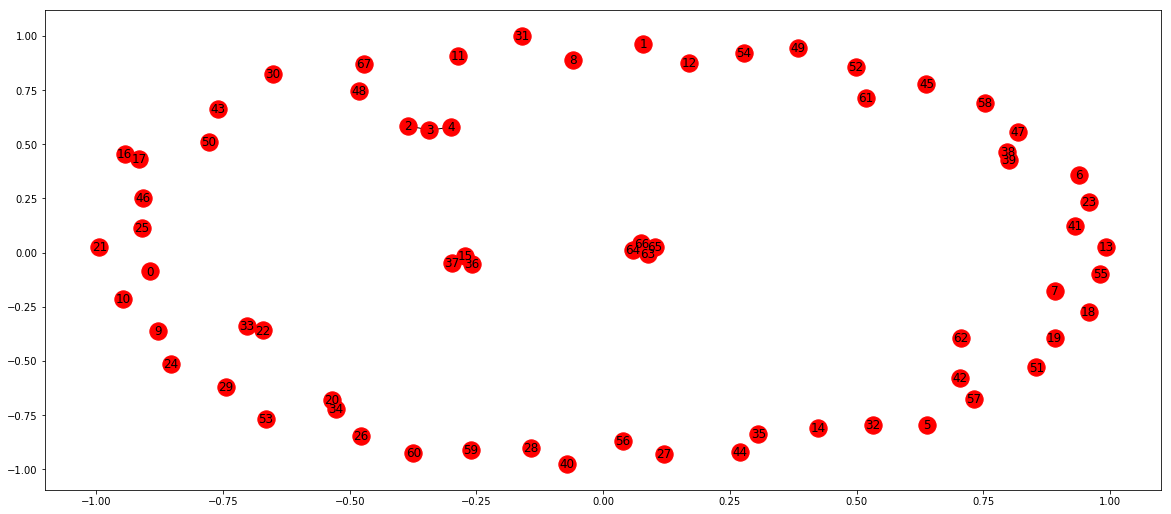

In [54]:
#creating graph
G = nx.Graph() 
plt.figure(figsize =(20, 30)) 

G.add_nodes_from(get_nodes(adj_matrix_0_018)) 
G.add_edges_from(get_edges(adj_matrix_0_018)) 
  
# First Graph created 
plt.subplot(311) 
nx.draw_networkx(G) 

In [55]:
adj_matrix_0_036 = adj_matrix_0_036.applymap(lambda x: 1 if x <= 0.036 else 0)

In [56]:
adj_matrix_0_036

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522972.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522973.1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522974.1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522975.1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528232.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528233.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757995.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757996.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


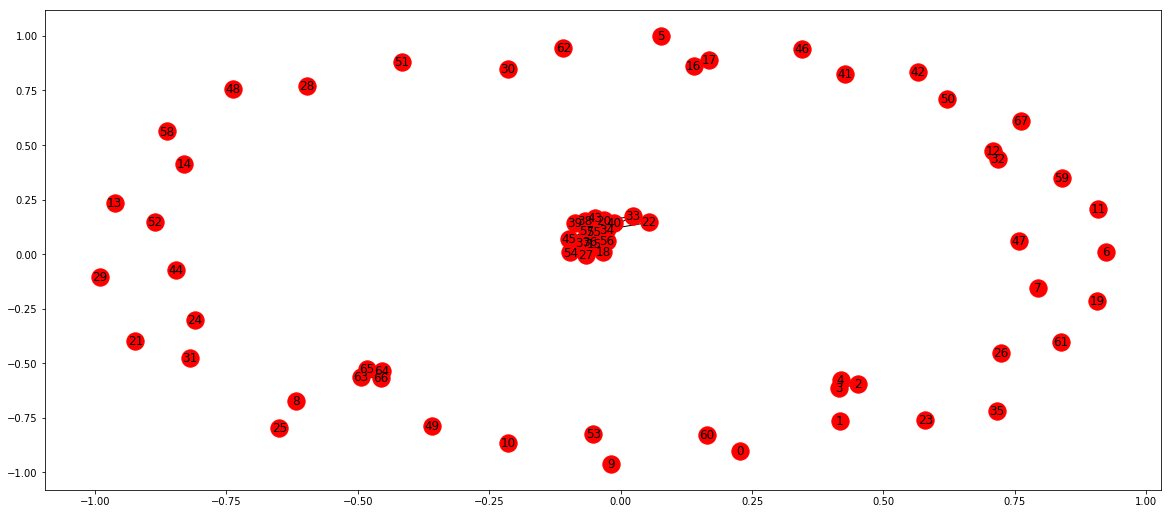

In [57]:
plt.figure(figsize =(20, 30)) 

G.add_nodes_from(get_nodes(adj_matrix_0_036)) 
G.add_edges_from(get_edges(adj_matrix_0_036)) 
  
plt.subplot(311) 
nx.draw_networkx(G) 

In [58]:
adj_matrix_0_055 = adj_matrix_0_055.applymap(lambda x: 1 if x <= 0.055 else 0)

In [59]:
adj_matrix_0_055

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522972.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522973.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522974.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522975.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528232.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
LC528233.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757995.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757996.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


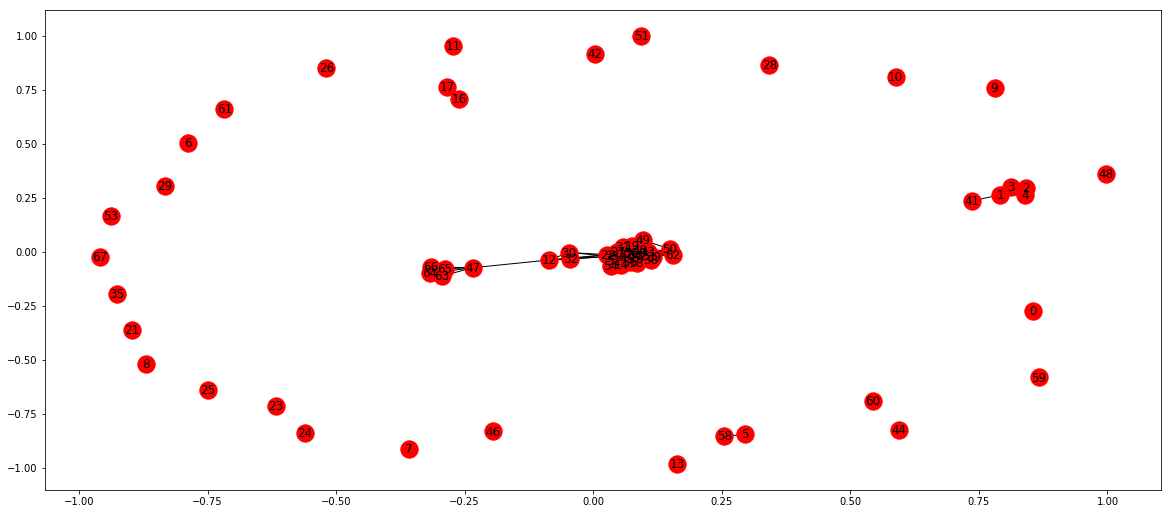

In [60]:
plt.figure(figsize =(20, 30)) 

G.add_nodes_from(get_nodes(adj_matrix_0_055)) 
G.add_edges_from(get_edges(adj_matrix_0_055)) 
  
plt.subplot(311) 
nx.draw_networkx(G) 

In [61]:
adj_matrix_0_075 = adj_matrix_0_075.applymap(lambda x: 1 if x <= 0.075 else 0)

In [62]:
adj_matrix_0_075

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522972.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522973.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522974.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC522975.1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LC528232.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
LC528233.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757995.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757996.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


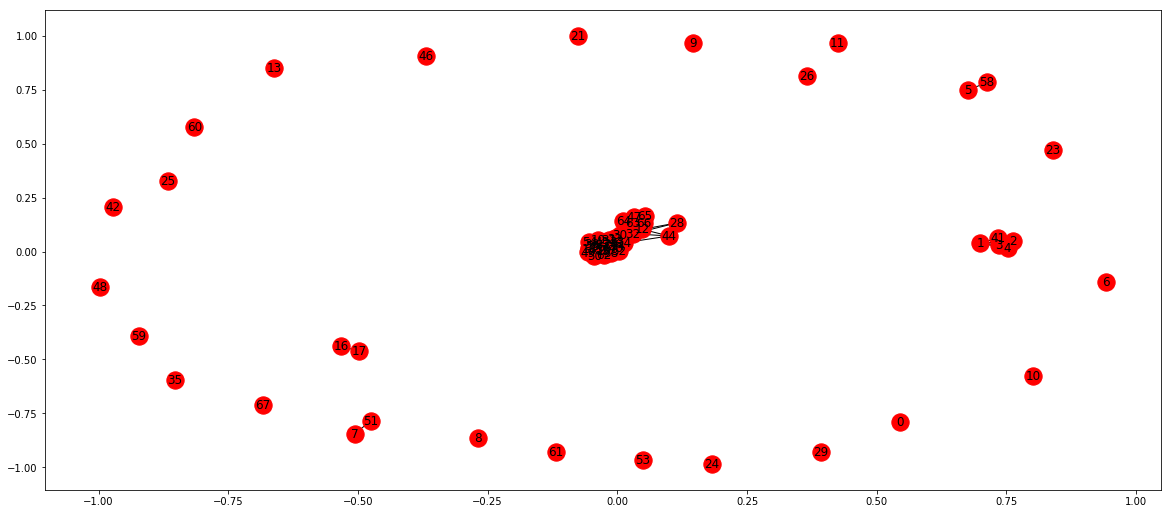

In [63]:
plt.figure(figsize =(20, 30)) 

G.add_nodes_from(get_nodes(adj_matrix_0_075)) 
G.add_edges_from(get_edges(adj_matrix_0_075)) 
  
plt.subplot(311) 
nx.draw_networkx(G) 

In [64]:
adj_matrix_2_0 = adj_matrix_2_0.applymap(lambda x: 1 if x <= 2.0 else 0)

In [65]:
adj_matrix_2_0

,LC521925.1,LC522972.1,LC522973.1,LC522974.1,LC522975.1,LC528232.1,LC528233.1,LR757995.1,LR757996.1,LR757997.1,LR757998.1,MG772933.1,MN908947.3,MN938384.1,MN975262.1,MN985325.1,MN988668.1,MN988669.1,MN988713.1,MN994467.1,MN994468.1,MN996527.1,MN996528.1,MN996529.1,MN996530.1,MN996531.1,MN996532.1,MN997409.1,MT007544.1,MT012098.1,MT019529.1,MT019530.1,MT019531.1,MT019532.1,MT019533.1,MT020781.1,MT020880.1,MT020881.1,MT027062.1,MT027063.1,MT027064.1,MT039873.1,MT039887.1,MT039888.1,MT039890.1,MT044257.1,MT044258.1,MT049951.1,MT050493.1,MT066175.1,MT066176.1,MT072688.1,MT093571.1,MT093631.1,MT106052.1,MT106053.1,MT106054.1,MT118835.1,MT123290.1,MT123291.1,MT123292.1,MT123293.1,MT126808.1,MT135041.1,MT135042.1,MT135043.1,MT135044.1,MT152824.1
LC521925.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC522972.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC522973.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC522974.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC522975.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC528232.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LC528233.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LR757995.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LR757996.1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
LR757997.1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


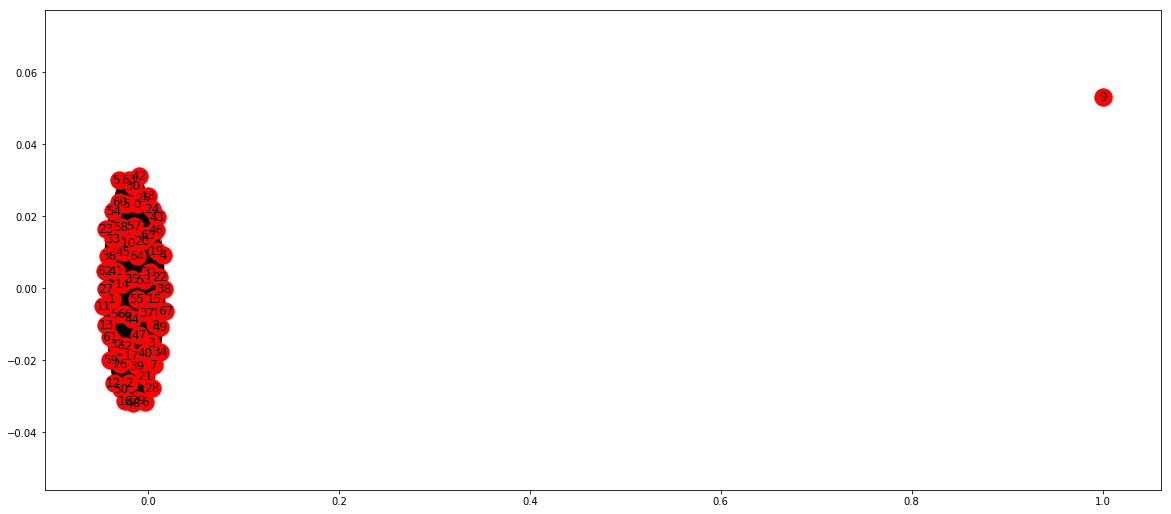

In [66]:
plt.figure(figsize =(20, 30)) 

G.add_nodes_from(get_nodes(adj_matrix_2_0)) 
G.add_edges_from(get_edges(adj_matrix_2_0)) 
  
plt.subplot(311) 
nx.draw_networkx(G) 